# Assignment 3B
Chandler Smith

Summary: The goal of this project was to explore MLR and logistic regression in depth. This incolved setting up the full ML pipeline, manipulating data, and playing around with the models for optimization. This provided invaluable experience regarding iterating over a model, just like we would if provided a real life problem. 

## House Price MLR


In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

import sklearn 

from sklearn import datasets
import random
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno


import warnings
warnings.filterwarnings('ignore') 
sns.set(rc={'figure.figsize':(11,8)})

pd.options.display.float_format = '{:.2f}'.format

# Part 1: MLR

## Import House Price for MLR

In [ ]:
%cd '/Users/chandlersmith/Desktop/CS6140/HW3'
os.listdir()

# The first column is index: skipping that column
ct = pd.read_csv("HousePrice.csv")
ct = ct.iloc[:, 1:]
ct.head()

## <font color = darkblue> Multiple Linear Regression (MLR)

## Variables = Columns:
### Numerical Columns
OverallQual   TotRmsAbvGrd    BsmtFullBath
MasVnrArea      MSSubClass      FullBath        LotArea BedroomAbvGr    Fireplaces      GarageCars      KitchenAbvGr    OverallCond     GarageArea      YearBuilt       PoolArea        

### Categorical Columns
Neighborhood    BldgType        BsmtExposure    HouseStyle      RoofMatl        KitchenQual     BsmtQual        MSZoning        Heating
SaleType        

### Targey
SalePrice

Notes from lecture discussion: Maximize coeff
- Predict sale price - standardize, encode categorical, 
- remove sale price as part of feature space
- Increase % coor as much as prossible
    - Test, train, split

Titanic
- Ignore correlation for categorical columns
- Should not have 90% percent
- Don't standardize the response column

### Creating the dataframe

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
    
# remove NaNs from the table
ct2 = ct.dropna()

'''Given the independence of each row, it makes sense to remove the NaNs instead of using means or medians.'''

# Encode and standardize categorical variables

for i in ct2:
    if ct2[i].dtype == "object":
        encode = LabelEncoder()
        ct2[i] = encode.fit_transform(ct2[i])
# print(ct2.head) # CONF

# now all my categorical columns are encoded, yay!
# Declaring the response column and the feature space

''' iloc indexes data. The first column is an index so we can drop that, and the last column is our target
 variable which we don't include in our feature space.'''

X = ct2.iloc[:, :-1]
#print(X)
y = ct2["SalePrice"]
#print(ct2["SalePrice"])



# ----------------------------------------
# train - test split
# Notice the test_size hyperparameter
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)



### Standardize and train the model

In [ ]:
''' Here, we are performing feature scaling. Passing the data through fit should find the mean and SD of the data. 
After fitting, we transform the data which means normalizing and scaling. '''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_stand = scaler.transform(X_train.values)

scaler.fit(X_test)
X_test_stand = scaler.transform(X_test.values)

# ------------------------------------------------------
# Train the model
# Done in two ways:
# Unstandardized features and then standardizae features
# ------------------------------------------------------

from sklearn.linear_model import LinearRegression
#model1 = LinearRegression().fit(X_train, y_train)
model2 = LinearRegression().fit(X_train_stand, y_train)



### Printing the output

In [ ]:

print("Model score, same as coeff of determination = R2")
print("Standardized model:", model2.score(X_test_stand, y_test))
print("-----------")

print("Model hyperparameters")
print(model2.get_params())
print("-----------")

print("Model coefficients: ",model2.coef_)
print("-----------")


print("Model intercept: ",model2.intercept_)
print("-----------")

from sklearn.metrics import r2_score
print("Coefficient of determination = R2: ",r2_score(y_test, model2.predict(X_test_stand)))
print("-----------")

from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test,model2.predict(X_test_stand)))
print("-----------")


## Data Analysis
After encoding the categorical columns and standardizing all the data, we ran a train - test split on the model. 1131 rows were used for training, reserving 283 for the test. The result of the model was 0.81 coeff. This is pretty good, however, I think we can do better. I am going to run a pairplot and correlation matrix to see if I can remove a few of the least coorelated columns. This should increase my model score. 

1) Run pairplots and corrleation matrix to identify columns that are highly associated with Sale Price. 

The intent of this is to let the feature set present the most associated features to us rather than our bias dominating what we focus on. 

In [ ]:
# run pairplots
#pairplots is a suit of graphs which compare all features in a matrix
# Cite: https://medium.com/@jpeavy09/making-a-pair-plot-using-the-seaborn-library-with-python-bac060479018
sns.pairplot(ct2)

In [ ]:
#Isolate the Sale Price column
# This makes it much easier to view a comparison
sns.pairplot(ct2, x_vars=['SalePrice'])

In [ ]:
# Run Correlation matrix
# Visualize it with seaborn
# Cite: https://datatofish.com/correlation-matrix-pandas/
corr_matrix = ct2.corr()
sns.heatmap(corr_matrix, annot=True) 
sns.heatmap(corr_matrix,annot=True) 

## Improving the model

I am going to run a little experiment. My goal is to remove the features that are lowering my models coefficient. To do this, I should be able to calculate the P value for each feature, and then removce the highest one. I will then recalculate the coefficient and if it goes up, yay, but if it goes down, I can put it back in. This process run recursively should yield the highest coefficient. 
cite: https://machinelearningmind.com/2019/10/14/feature-elimination-using-p-values/
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html


In [ ]:
import statsmodels.api as sm
# OLS = ordinary least squares
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaler.fit(X)
#X = scaler.transform(X.values)
X_stand = sm.add_constant(X)

OLSmodel = sm.OLS( y, X_stand)
results = OLSmodel.fit()
print(results.summary())

With the above information, I can clearly see several variable which I can remove, and run again. 
- SaleType
- Heating
- MSZoning 
- BldgType
- PoolArea
- GarageArea
- GarageCars
- BedroomAbvGr
- MSSubClass

In [ ]:

X_opt = ct2.drop(["SaleType", "Heating", "MSZoning", "BldgType", "PoolArea", "GarageArea",
                    "GarageCars", "BedroomAbvGr", "MSSubClass", "SalePrice"], axis=1)
print(X_opt)
y = ct2["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()

scaler.fit(X_train)
X_train_stand = scaler.transform(X_train.values)

scaler.fit(X_test)
X_test_stand = scaler.transform(X_test.values)

from sklearn.linear_model import LinearRegression
model_Opt = LinearRegression().fit(X_train_stand, y_train)

In [ ]:
print("Model score, same as coeff of determination = R2")
print("Standardized model:", model_Opt.score(X_test_stand, y_test))
print("-----------")

print("Model hyperparameters")
print(model_Opt.get_params())
print("-----------")

print("Model coefficients: ",model_Opt.coef_)
print("-----------")


print("Model intercept: ",model_Opt.intercept_)
print("-----------")

from sklearn.metrics import r2_score
print("Coefficient of determination = R2: ",r2_score(y_test, model_Opt.predict(X_test_stand)))
print("-----------")

from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test,model_Opt.predict(X_test_stand)))
print("-----------")

Well, at the end of the day, the R2 value didn't change much at all. It went from .812 to .816. That being said, the process here produce a faster model, so it is worth going through this process, and further automating it. If I were going to automate it, I would do it one variable at a time to really hone in on the optimal result. 

# Part 2: Linear Regression

## <font color = darkblue> Stochastic Gradient Descent Regressor

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, reg.predict(X_test))

# reg.get_params()


In [ ]:
sgd = SGDRegressor()
sgd.fit(X_train_stand, y_train)
sgd.score(X_test_stand, y_test)

In [ ]:
sgd.densify()

## <font color = darkblue>  Logistic Regression

Part 2, the titanic. Here, the response variable will be a binary outcome. Did they survive, or did they not. We will use accuracy to predict this metric. I began this project by using csvkit to convert my txt file to a csv,
Command line prompt:
 - csvformat -T -U 1 Titanic_Passengers.txt > Titanic_Passengers.csv


In [157]:
# The first column is index: skipping that column
ct = pd.read_csv("Titanic_Passengers.csv")
ct = ct.iloc[:, :]
ct.head()

,Passenger Class,Survived,Name,Sex,Age,Siblings and Spouses,Parents and Children,Ticket #,Fare,Cabin,Port,Lifeboat,Body,Home / Destination,Midpoint age
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.34,B5,S,2,NaN,"St Louis, MO",27.50
1,1,Yes,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",2.50
2,1,No,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.50
3,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.00,"Montreal, PQ / Chesterville, ON",32.50
4,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",27.50


### Data Cleaning
Upon reviewing my data, I have two problematic columns, life boat and Body. Most of my Body values are NaNs, so I am going to remove Body all together because it wouldn't provide much value. For lifeboat, I don't want to remove it because it probably correlates highly with survival so I am going to change NaNs to 0. 

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


# impute tools
meanImputer = SimpleImputer(strategy='mean')

#Clean column title
ct2 = ct.rename(columns={'Home / Destination': "Destination"})
ct2['Destination'].fillna("Unknown", inplace=True)
ct2['Destination'] = ct2['Destination'].astype(str)
ct2 = ct2.drop(columns=["Body"])
ct2.dropna(subset=["Port"], inplace=True)
ct2['Lifeboat'].fillna("0", inplace=True)
ct2['Lifeboat'] = ct2['Lifeboat'].astype(str)
ct2['Cabin'].fillna("0", inplace=True)

meanAge = ct2['Age'].mean()
ct2['Age'].fillna(meanAge, inplace=True)

meanMidpointAge = ct2['Midpoint age'].mean()
ct2['Midpoint age'].fillna(meanMidpointAge, inplace=True)

ct2.dropna( inplace = True)

# Encode and standardize categorical variables
for i in ct2:
    if ct2[i].dtype == "object":
        encode = LabelEncoder()
        print(ct2[i])
        ct2[i] = encode.fit_transform(ct2[i])
#print(ct2.head) 

# Declaring the response column and the feature space

X = ct2.iloc[:, ct2.columns != 'Survived']
#print(X)
y = ct2["Survived"]

ct2.to_csv("temp.csv", index=False)

# ----------------------------------------
# train - test split
# Notice the test_size hyperparameter
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train.values)

scaler.fit(X_test)
X_test = scaler.transform(X_test.values)

print(X_train.shape)
print(X_test.shape)


0       Yes
1       Yes
2        No
3        No
4        No
       ... 
1304     No
1305     No
1306     No
1307     No
1308     No
Name: Survived, Length: 1306, dtype: object
0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: Name, Length: 1306, dtype: object
0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Nam

### MinMax Scaler

In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [211]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [212]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([8.79231561e-01, 9.64115337e-01, 9.30704365e-01, 1.99457474e-01,
       9.84791830e-01, 1.21127641e-05, 2.37495318e-02, 9.56911784e-01,
       6.10527280e-02, 9.80723840e-01, 5.49477468e-01, 9.82507596e-01,
       8.82707065e-03, 7.91116375e-01, 9.43879286e-01, 2.17217234e-01,
       9.95301868e-01, 8.20075053e-04, 7.33525492e-06, 6.94135790e-06,
       8.02675045e-01, 6.09285333e-04, 8.14482095e-01, 3.55516667e-04,
       9.83350536e-01, 4.26083063e-01, 5.29343625e-05, 9.86837556e-01,
       9.58648355e-01, 9.44892395e-06, 9.82174687e-01, 2.62013717e-04,
       9.86195217e-01, 8.94948771e-01, 3.02849774e-01, 9.69694539e-01,
       4.39376964e-06, 9.47463588e-01, 9.72646592e-01, 9.51462914e-01,
       8.19569563e-01, 6.47858486e-03, 2.15222799e-04, 1.18238870e-03,
       9.83455533e-01, 9.70659013e-01, 9.80778167e-01, 6.31559419e-05,
       5.74622534e-02, 7.36153225e-01, 2.53010981e-01, 9.81656892e-01,
       9.77823975e-01, 8.22412731e-01, 1.42215010e-01, 2.86197984e-05,
      

In [213]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9389


In [214]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9521
Test set score: 0.9389


In [182]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

# fit the model
logreg100.fit(X_train, y_train)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9559
Test set score: 0.9351


In [167]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[132  25]
 [ 31  74]]

True Positives(TP) =  132

True Negatives(TN) =  74

False Positives(FP) =  25

False Negatives(FN) =  31


<AxesSubplot:>

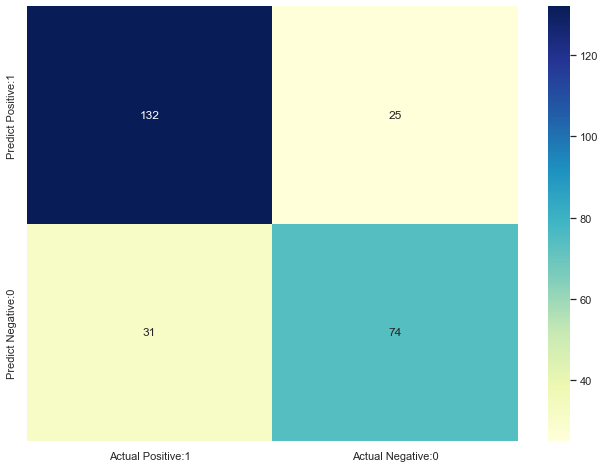

In [168]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [169]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.75      0.70      0.73       105

    accuracy                           0.79       262
   macro avg       0.78      0.77      0.78       262
weighted avg       0.78      0.79      0.79       262



In [170]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [171]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9531


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [172]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7863


## <font color = darkblue> Sigmoid function

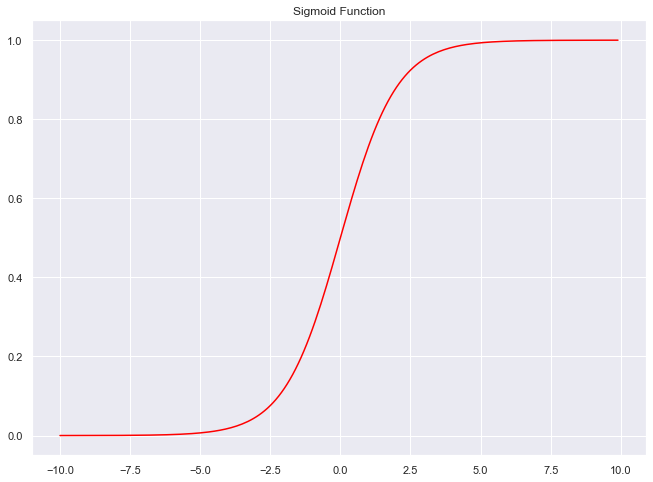

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))

sns.lineplot(x, y, color = 'red')
plt.title('Sigmoid Function')
plt.show()



## Optimization run
Now that I have a baseline result of around 0.72 unstandardized and 0.92 standardized, let's run an elimation method to identify what features in the feature space could be removed to improve accuracy. 

In [181]:
import statsmodels.api as sm
# OLS = ordinary least squares
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaler.fit(X)
#X = scaler.transform(X.values)
X_stand = sm.add_constant(X)

OLSmodel = sm.OLS( y, X_stand)
results = OLSmodel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     199.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.91e-297
Time:                        00:49:37   Log-Likelihood:                -191.78
No. Observations:                1306   AIC:                             411.6
Df Residuals:                    1292   BIC:                             484.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6447 

According to the above, we should remove the following categories based on high p-values. 
- Midpoint age
- Port
- Fare
- Ticket Number
- Parents and Children
- Age
- Name

Let's try it and see if our accuracy improves!

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

ct = pd.read_csv("Titanic_Passengers.csv")
ct = ct.iloc[:, :]

# impute tools
meanImputer = SimpleImputer(strategy='mean')

#Clean column title
ct2 = ct.rename(columns={'Home / Destination': "Destination"})
ct2['Destination'].fillna("Unknown", inplace=True)
ct2['Destination'] = ct2['Destination'].astype(str)
#ct2 = ct2.drop(columns=["Body"])
ct2.dropna(subset=["Port"], inplace=True)
ct2['Lifeboat'].fillna("0", inplace=True)
ct2['Lifeboat'] = ct2['Lifeboat'].astype(str)
ct2['Cabin'].fillna("0", inplace=True)

#ct2.dropna( inplace = True)

ct2 = ct2.drop(columns=["Body", "Midpoint age", "Port", "Fare", "Ticket #", "Parents and Children", "Age", "Name"])


# Encode and standardize categorical variables
for i in ct2:
    if ct2[i].dtype == "object":
        encode = LabelEncoder()
        print(ct2[i])
        ct2[i] = encode.fit_transform(ct2[i])
print(ct2.head) 

# Declaring the response column and the feature space

X = ct2.iloc[:, ct2.columns != 'Survived']
#print(X)
y = ct2["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



print(X_train.shape)
print(X_test.shape)

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
1304     No
1305     No
1306     No
1307     No
1308     No
Name: Survived, Length: 1307, dtype: object
0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: Sex, Length: 1307, dtype: object
0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1304          0
1305          0
1306          0
1307          0
1308          0
Name: Cabin, Length: 1307, dtype: object
0        2
1       11
2        0
3        0
4        0
        ..
1304     0
1305     0
1306     0
1307     0
1308     0
Name: Lifeboat, Length: 1307, dtype: object
0                          St Louis, MO
1       Montreal, PQ / Chesterville, ON
2       Montreal, PQ / Chesterville, ON
3       Montreal, PQ / Chesterville, ON
4       Montreal, PQ / Chesterville, ON
                     ...              

In [242]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [243]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [244]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.90130441, 0.89407951, 0.89250839, 0.90754993, 0.47139273,
       0.32225057, 0.83735145, 0.87551852, 0.88223989, 0.90754993,
       0.41445079, 0.40699792, 0.85814179, 0.31194224, 0.87723836,
       0.40865857, 0.49672125, 0.81725966, 0.26748219, 0.90754993,
       0.47560746, 0.90138154, 0.90754993, 0.31000077, 0.90754993,
       0.90754993, 0.82416152, 0.9089587 , 0.90754993, 0.32966013,
       0.41033121, 0.30656341, 0.91306972, 0.87550027, 0.37403482,
       0.90754993, 0.32595408, 0.87556392, 0.90754993, 0.89243096,
       0.46718208, 0.85813033, 0.30128261, 0.35076156, 0.9089587 ,
       0.32225057, 0.90754993, 0.28171251, 0.88311286, 0.90754993,
       0.43769123, 0.90754993, 0.89263669, 0.4629761 , 0.43337455,
       0.30542549, 0.28629738, 0.46714359, 0.88771712, 0.31194224,
       0.89406678, 0.87557266, 0.47560746, 0.90736415, 0.4629761 ,
       0.42588956, 0.89245742, 0.89250517, 0.88586276, 0.46252475,
       0.37597051, 0.90725037, 0.83733438, 0.4629761 , 0.90746

In [245]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [246]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7748


## Analysis:

The original result of the unstandardized data was a model that produced about a .72 accuracy score. After standardization, this went up to .92, which seems too high. I believe it is too high because I standardized on the categorical data which I had previously encoded, but I am not 100% sure. For the task at hand, identifying what is the combination of deatures that provides the most accurate prediction, it shouldn't matter too much.

By removing the following columns based on p_value:
- Midpoint age
- Port
- Fare
- Ticket Number
- Parents and Children
- Age
- Name

The accuracy on the unstandardized data went up to 0.77 and the standardized data stayed at about .85, which likely points to a failure in my data cleaning. Given the results on the unstandardized data, I believe that removing the columns did improve the overall accuracy of the model. 